## Cơ sở lý thuyết KMeans

Thuật toán K Means là một trong những thuật toán cơ bản của nhóm các thuật toán Unsupervised Learning. Trong thuật toán K Means clustering, chúng ta không biết nhãn (labels) của từng điểm dữ liệu. Mục đích của các thuật toán phân cụm nói chung và K Means nói riêng là làm thế nào để phân dữ liệu thành các cụm có (cluster) khác nhau sao cho dữ liệu trong mỗi cụm có cùng một tính chất nào đó giống nhau.

Ý tưởng đơn giản nhất về cụm là tập hợp những điểm nằm ở gần nhau trong một không gian nào đó. Không gian có thể có nhiều chiều khi dữ liệu rất lớn.

Hình dưới minh họa về ba cụm dữ liệu
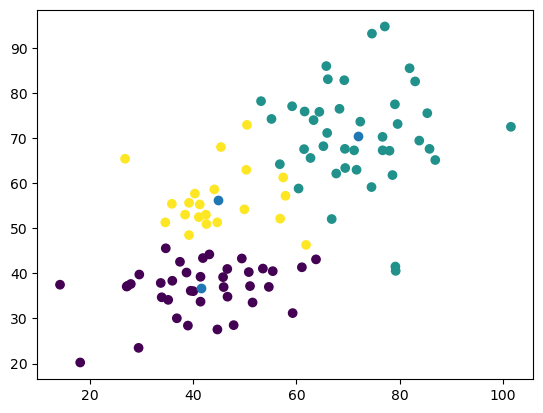

Mỗi điểm hiển thị màu xanh dương biểu thị cho tâm cụm.


### Phân tích toán học

$$X = [x_1, x_2, x_3, ... x_N] \in \mathbb{R}^{d \times N}$$

$$M = [m_1, m_2, ... m_k] \in \mathbb{R}^{d \times 1}$$

Với mỗi $x_i$ được phân vào cluster $k$ thì

$$y_{ik} = 1 \quad và \quad y_{ij} = 0; \qquad j \ne k$$

Ràng buộc của của $y_i$ có thể được viết dưới dạng toán học như sau

$$y_{ik} \in \left \{ 0, 1 \right \}, \quad  \sum_{k = 1}^{k} y_{ik} = 1 \qquad \qquad (1)$$

$m_k$ là trung tâm của mỗi cụm cluster, nếu tất cả các cụm được phân vào cluster bởi $m_k$ thì, mỗi điểm dữ liệu $x_i$ khi phân vào cluster $k$ thì sẽ có sai số là $(x_i - m_k)$.

Vậy, sai số của một điểm dữ liệu $x_i$ là:
$$\left \| x_i - m_k \right\|_2^2 = y_{ik} \|x_i - m_k\|_2^2 = \sum_{j = 1}^{K} y_{ij} \|x_i - m_k\|_2^2$$

Như vậy, sai số của toàn bộ điểm dữ liệu là:

$$L(Y, M) = \sum_{i = 1}^{N}\sum_{j=1}^{K} \|x_i - m_k\|_2^2$$

Trong đó $Y = [y_1, y_2, y_3,...y_N]$ và $M = [m_1, m_2, ... m_k]$

Như vậy, chúng ta cần tối ưu bài toán với điều kiện ở $(1)$:

$$Y, M = \arg \min_{Y,M} \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \left \| x_i - m_j \right \|_2^2 \qquad (2) \\ s.t: y_{ij} \in \{0, 1\} \quad \forall i, j; \qquad \sum_{j=1}^{K}y_{ij} = 1 \quad \forall i$$


### Giải bài toán tối ưu $(2)$


Để giải bài toán này, ta có thể tiếp cận theo hướng đơn giản. Đó xen kẽ giải $Y$ và $M$ khi biến còn lại được cố định.
Như vậy, ta sẽ giải xen kẽ 2 bài toán con như sau:

**Cố định $M$, tìm $Y$** 

Mục đích của bài toán này là tìm được bộ các label vector để hàm mất mát đạt giá trị nhỏ nhất. Điều này có nghĩa là ta sẽ tìm cụm cho mỗi điểm dữ liệu.

Bài toán $(2)$ được chia nhỏ thành bài toán tìm label vector cho một điểm dữ liệu $i$ như sau:

$$y_i = argmin \sum_{j = 1}^{K} y_{ij} \|x_i - m_j\|_2^2 \qquad (3) \\ s.t: y_{ij} \in \{0, 1\}; \qquad \sum_{j = 1}^{k}y_{ij} = 1$$

Ta có thể viết lại bài toán $(3)$ như sau:

$$j = argmin \|x_i - m_j\|_2^2$$  

Điều này có thể hiểu rằng ta đang cố gắng tìm tâm cụm gần với điểm $x_i$ nhất. Với $\|x_i - m_j\|$ là khoảng cách từ $x_i$ đến tâm $m_j$

**Cố định $Y$, tìm $M$** 

Mục đích của bài toán này là tìm được các tâm cụm mới của mỗi cụm sau khi tìm được các label vector sao cho hàm mất mát đạt giá trị nhỏ nhất.

Sau khi có được các label vector bài toán $(2)$ được rút gọn thành bài toán tìm center cho một cluster như sau:

$$m_j = argmin \sum_{i = 1}^{N} y_{ij} \|x_i - m_j\|_2^2 \qquad (4)$$

Bài toán này giải nó bằng đạo hàm theo ẩn $m_j$. Để thuận tiện, chúng ta đặt $g(m_j) = \sum_{i = 1}^{N} y_{ij} \|x_i - m_j\|_2^2$ hàm bên trong dấu $argmin$. Ta sẽ có đạo hàm như sau:

$$\frac{ \partial g(m_j)} {\partial m_j} = 2 \sum_{i = 1}^{N} y_{ij} (x_i - m_j) = 0$$

$$-> 2 \sum_{i = 1}^{N} (y_{ij}x_i - y_{ij}m_j) = 0 \\

->\sum_{i = 1}^{N} y_{ij}x_{i} = \sum_{i = 1}^{N} y_{ij}m_j \\
$$

Như vậy, rút $m_j$ ra, ta được:
$$m_j = \frac{\sum_{i = 1}^{N} y_{ij}x_{i}} {\sum_{i = 1}^{N} y_{ij}}$$


### Thuật toán

Thuật toán như sau [Nguồn: link https://machinelearningcoban.com/2017/01/01/kmeans/]


Đầu vào: Dữ liệu X và số lượng cluster cần tìm K.
Đầu ra:Các center M và label vector cho từng điểm dữ liệu

1. Chọn K điểm bất kỳ làm các center ban đầu
2. Phân mỗi điểm dữ liệu vào cluster có center gần nó nhất
3. Nếu việc gán dữ liệu vào từng cluster ở bước 2 không thay đổi nhiều thì ta dừng thuật toán
4. Cập nhật các center cho từng cluster bằng cách lấy trung bình cộng của các điểm dữ liệu đã được gán vào cluster đó sau bước 2.
5. Quay lại bước hai

Vắn tắt thuật toán sẽ như sau:
```
Chọn ngẫu nhiên tâm cụm.
repeat{
    Step1: Cố định K, tìm Y là các label vector
    Step2: Cố định Y, tìm K là các tâm cụm mới
}
Thuật toán dừng khi hàm tổn thất hội tụ.

```